Our imports

In [2]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

First we start by Edge Detection "Canny Edge Detection"

In [ ]:
#Notes:
#The effect of the Canny operator is determined by three parameters: 
# ✓ the width of the Gaussian kernel used in the smoothing phase (σ) 
#    If kernel is so big, many edges would be smoothed and blurred so only Strong edges would remain, but less strong edges would vanish.
#✓ the upper threshold of hysteresis 
#✓ and the lower threshold used by the tracker.
#   Large σ detects large scale edges.
#   Small σ detects fine features.
#The upper tracking threshold can be set quite high, and the lower threshold quite low for good results. 
#Setting the lower threshold too high will cause noisy edges to break up. 
#Setting the upper threshold too low increases the number of spurious and undesirable edge fragments appearing in the output

In [3]:
target_img_size = (256, 256)

In [4]:
cow_select=io.imread('images-to-be-tested/cow_with_selection.png')
garb_select=io.imread('images-to-be-tested/garbage_with_selection.png')

In [5]:
cow_orig=io.imread('images-to-be-tested/cow.jpg')
garb_orig=io.imread('images-to-be-tested/garbage.jpg')

In [6]:
cow_resized_img=cv2.resize(cow_select,target_img_size)
garb_resized_img=cv2.resize(garb_select,target_img_size)
cow_sel_resized=rgba2rgb(cow_resized_img)
garb_sel_resized=rgba2rgb(garb_resized_img)

cow_resized_orig=cv2.resize(cow_orig,target_img_size)
garb_resized_orig=cv2.resize(garb_orig,target_img_size)
normalized_garb_resized_img = (garb_resized_orig - np.min(garb_resized_orig)) / (np.max(garb_resized_orig) - np.min(garb_resized_orig))


print(normalized_garb_resized_img)
print(garb_sel_resized)

[[[0.04705882 0.06666667 0.00392157]
  [0.13333333 0.23137255 0.0745098 ]
  [0.16470588 0.31764706 0.0745098 ]
  ...
  [0.5254902  0.53333333 0.52941176]
  [0.32156863 0.45098039 0.4627451 ]
  [0.50980392 0.56862745 0.57254902]]

 [[0.07843137 0.1254902  0.04313725]
  [0.08235294 0.17254902 0.05098039]
  [0.03137255 0.16078431 0.00392157]
  ...
  [0.50980392 0.50980392 0.50980392]
  [0.6        0.6        0.6       ]
  [0.62352941 0.61960784 0.50980392]]

 [[0.08235294 0.12156863 0.05490196]
  [0.03529412 0.10588235 0.01176471]
  [0.14117647 0.22352941 0.09411765]
  ...
  [0.61960784 0.62745098 0.61568627]
  [0.5372549  0.54117647 0.51764706]
  [0.55686275 0.54901961 0.43529412]]

 ...

 [[0.61176471 0.59607843 0.54901961]
  [0.58431373 0.56862745 0.52156863]
  [0.59607843 0.58823529 0.5372549 ]
  ...
  [0.5372549  0.52156863 0.47843137]
  [0.52941176 0.51372549 0.47058824]
  [0.4745098  0.4745098  0.43529412]]

 [[0.61176471 0.58823529 0.53333333]
  [0.61176471 0.59215686 0.54117647]


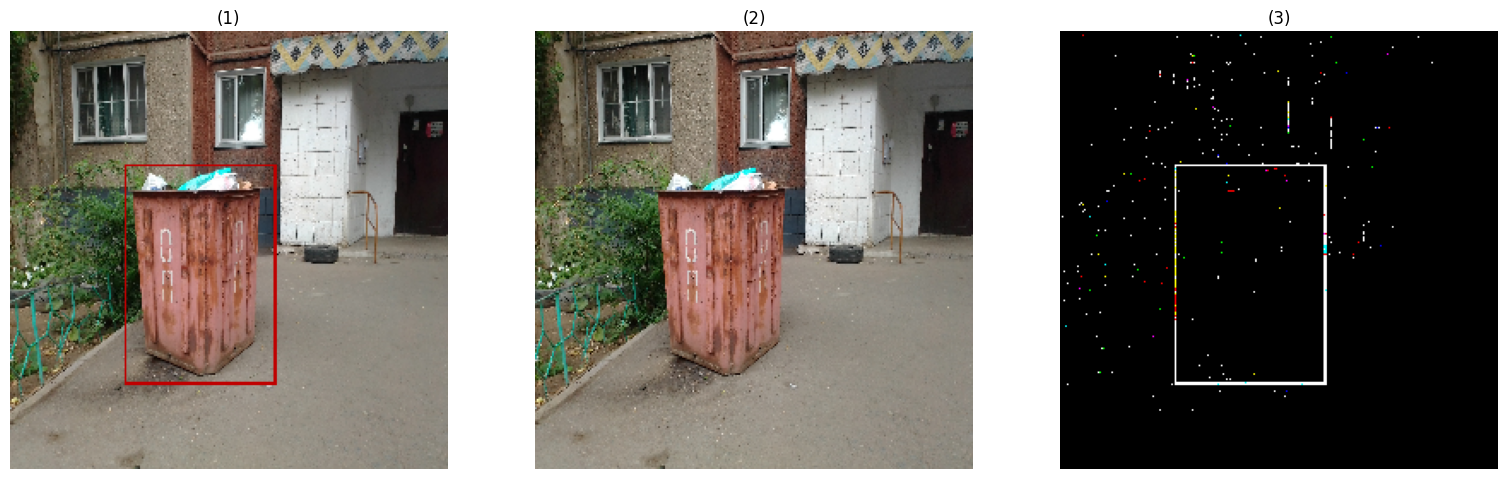

In [7]:
#diff:
difference_image_garb = np.abs(garb_sel_resized - normalized_garb_resized_img)

# Brightness Adjustment
result_image_garb=np.zeros((garb_sel_resized.shape))
result_image_garb[difference_image_garb>0.1]=1
result_image_garb[difference_image_garb<=0.1]=0
#result_image_garb = np.where(difference_image_garb > 0.09, 1, garb_resized_orig)

show_images(images=[garb_sel_resized,normalized_garb_resized_img,result_image_garb])


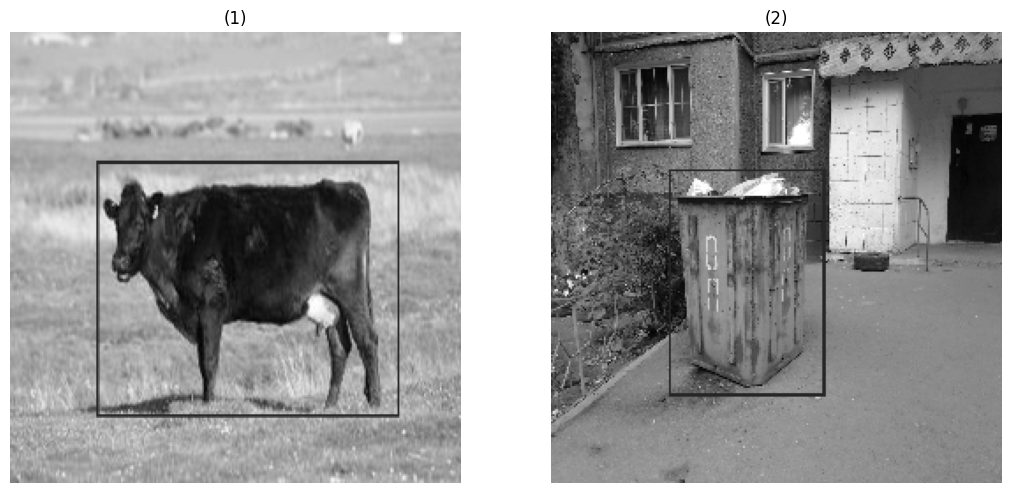

0.008416470588235294
0.9991517647058824
0.011176470588235295
1.0


In [62]:
# cow_img_scaled = (cow_img * 255).astype(np.uint8)
# garb_img_scaled = (garb_img * 255).astype(np.uint8)

interm_cow=rgba2rgb(cow_resized_img)
gray_cow_img=rgb2gray(interm_cow)

interm_garb=rgba2rgb(garb_resized_img)
gray_garb_img=rgb2gray(interm_garb)

show_images(images=[gray_cow_img, gray_garb_img])

print(np.min(gray_cow_img))
print(np.max(gray_cow_img))

print(np.min(gray_garb_img))
print(np.max(gray_garb_img))

# #show hist to be able to see grayscale dist:
#I CANNOT SHOW HIST!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


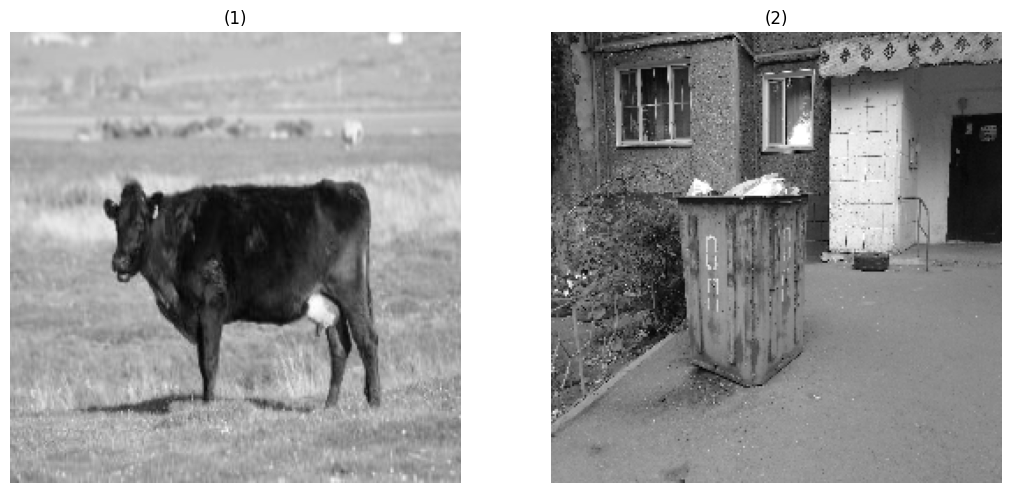

0.016787450980392155
1.0
0.0
0.998586274509804


In [102]:
# cow_img_scaled = (cow_img * 255).astype(np.uint8)
# garb_img_scaled = (garb_img * 255).astype(np.uint8)



#mid_cow=rgba2rgb(cow_resized)
gray_cow=rgb2gray(cow_resized)

# mid_garb=rgba2rgb(garb_resized)
gray_garb=rgb2gray(garb_resized)

show_images(images=[gray_cow, gray_garb])

print(np.min(gray_cow))
print(np.max(gray_garb))

print(np.min(gray_garb))
print(np.max(gray_cow))


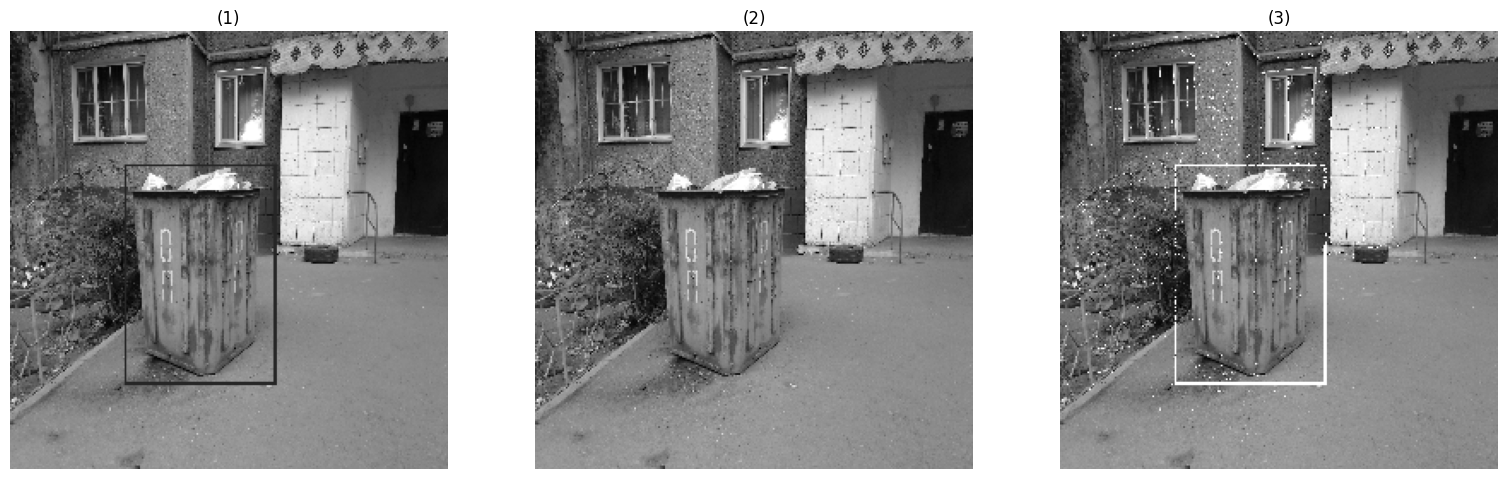

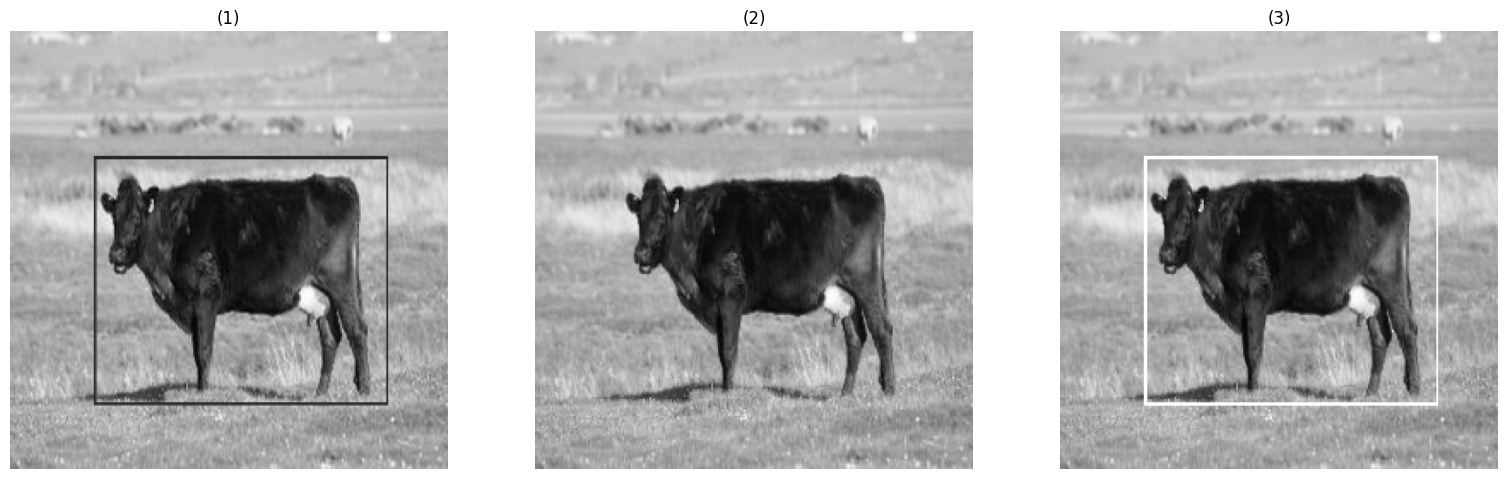

In [141]:
# before preprocessing: compare both and adjust brightness:

# Image Differencing
difference_image_garb = np.abs(gray_garb_img - gray_garb)

# Brightness Adjustment
result_image_garb = np.where(difference_image_garb > 0.09, 1, gray_garb)

show_images(images=[gray_garb_img,gray_garb,result_image_garb])




# Image Differencing
difference_image_cow = np.abs(gray_cow_img - gray_cow)

# Brightness Adjustment
result_image_cow=np.zeros((gray_cow.shape))
result_image_garb[difference_image_garb>0.1]=1
#result_image_cow = np.where(difference_image_cow > 0.09, 1, gray_cow)

show_images(images=[gray_cow_img,gray_cow,result_image_cow])



# sp_removal_cow=median(result_image_cow)
# sp_removal_garb=median(result_image_garb)
# show_images(images=[sp_removal_cow, sp_removal_garb])

In [97]:
def gammaCorrection(img,c,gamma):
     image=(img*255)
     image = (image ** gamma) * c
     return image

In [142]:
# # preprocessing original
# guassian_cow_orig=gaussian(gray_cow,sigma=1.5)
# guassian_garb_orig=gaussian(gray_garb,sigma=1.5)

# #Histogram Equalization
# grab_equalized_orig= equalize_hist(guassian_garb_orig)
# show_images(images=[guassian_garb_orig, grab_equalized_orig])

# # contast enhancement:
# enhanced_img_orig = gammaCorrection(grab_equalized_orig,1,0.2)

# #garb_enhanced = equalize_adapthist(enhanced_img, clip_limit=0.05) #normalized between 0 and 1 (higher values give more contrast).

# show_images(images=[grab_equalized_orig, enhanced_img_orig])

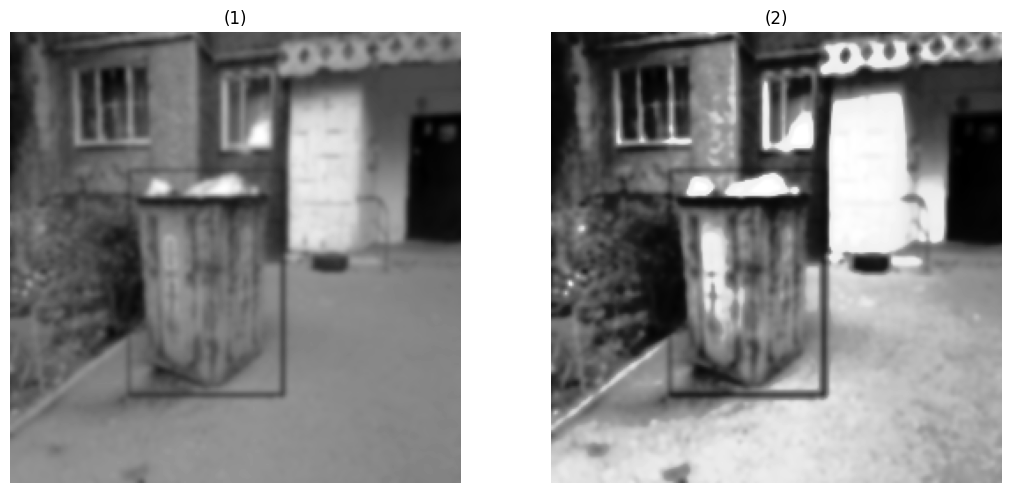

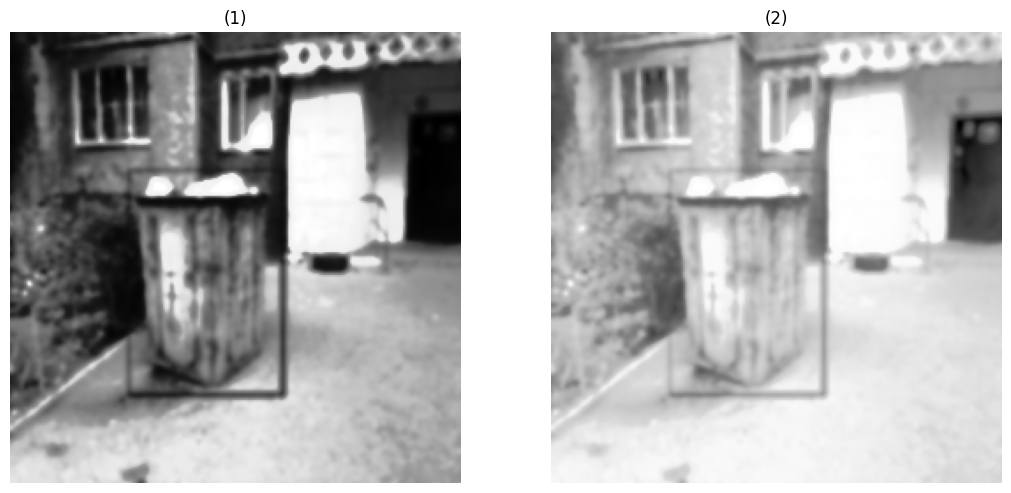

In [143]:
#Preprocessing after selection:

# gaussian
guassian_cow=gaussian(gray_cow_img,sigma=1.5)
# show_images(images=[gray_cow_img, guassian_cow])
guassian_garb=gaussian(gray_garb_img,sigma=1.5)
# show_images(images=[gray_garb_img, guassian_garb])


# Local Contrast Enhancmenet
#equalize_adapthist: Contrast Limited Adaptive Histogram Equalization (CLAHE)
#skimage.exposure.equalize_hist: Return image after histogram equalization
# garb_enhanced = equalize_adapthist(guassian_garb, clip_limit=0.05) #normalized between 0 and 1 (higher values give more contrast).
# show_images(images=[guassian_garb, garb_enhanced])

#Histogram Equalization
grab_equalized= equalize_hist(guassian_garb)
show_images(images=[guassian_garb, grab_equalized])

# contast enhancement:
enhanced_img = gammaCorrection(grab_equalized,1,0.3)

#garb_enhanced = equalize_adapthist(enhanced_img, clip_limit=0.05) #normalized between 0 and 1 (higher values give more contrast).
show_images(images=[grab_equalized, enhanced_img])

# Adaptive thresholding

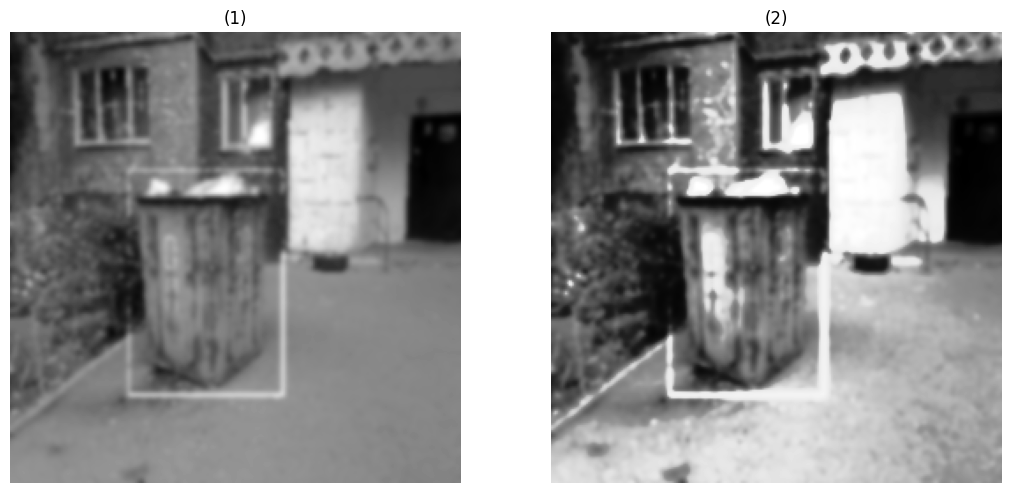

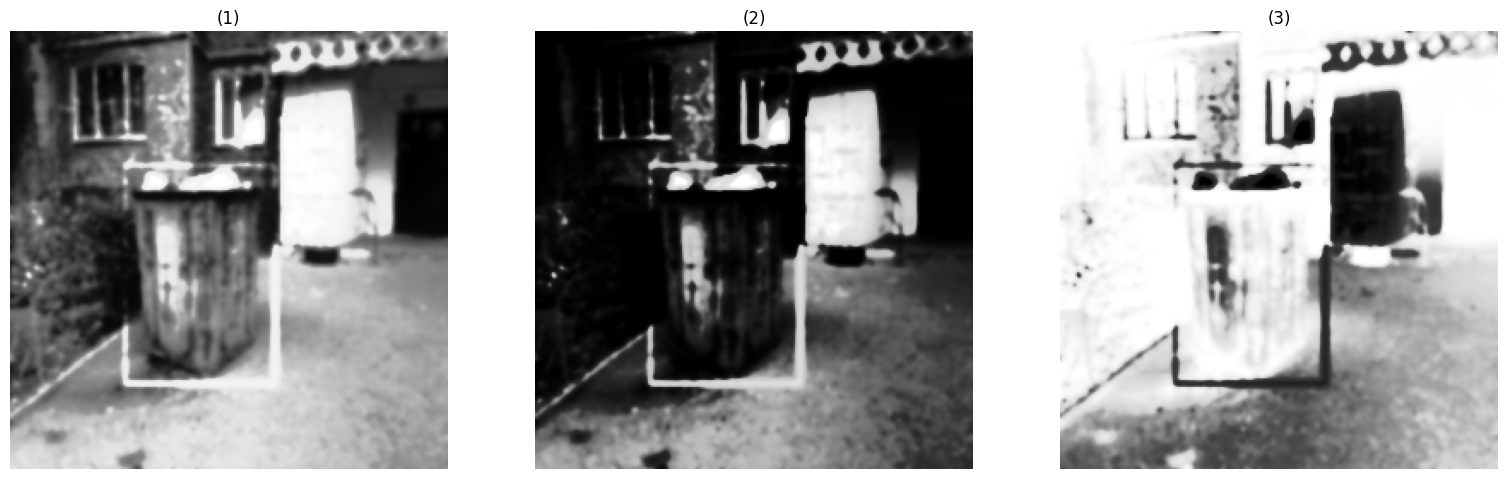

In [147]:
#Preprocessing after selection:

# gaussian
guassian_cow_2=gaussian(result_image_cow,sigma=1.5)
# show_images(images=[gray_cow_img, guassian_cow])
guassian_garb_2=gaussian(result_image_garb,sigma=1.5)
# show_images(images=[gray_garb_img, guassian_garb])


# Local Contrast Enhancmenet
#equalize_adapthist: Contrast Limited Adaptive Histogram Equalization (CLAHE)
#skimage.exposure.equalize_hist: Return image after histogram equalization
# garb_enhanced = equalize_adapthist(guassian_garb, clip_limit=0.05) #normalized between 0 and 1 (higher values give more contrast).
# show_images(images=[guassian_garb, garb_enhanced])

#Histogram Equalization
grab_equalized_2= equalize_hist(guassian_garb_2)
show_images(images=[guassian_garb_2, grab_equalized_2])

# contast enhancement:
enhanced_img_2 = gammaCorrection(grab_equalized_2,1,3)

#garb_enhanced = equalize_adapthist(enhanced_img, clip_limit=0.05) #normalized between 0 and 1 (higher values give more contrast).
show_images(images=[grab_equalized_2, enhanced_img_2, 1-enhanced_img_2])

# Adaptive thresholding

In [ ]:
#binary images
threshold_value = 0.5  # Adjust the threshold based on your image
garb_orig_bin=np.zeros((gray_garb.shape))
garb_orig_bin[gray_garb > threshold_value]=1

garb_bin=np.zeros((gray_garb_img.shape))
threshold_value = 0.5 
# Adjust the threshold based on your image
garb_bin[gray_garb_img > threshold_value]=1

show_images(images=[garb_orig_bin, garb_bin])


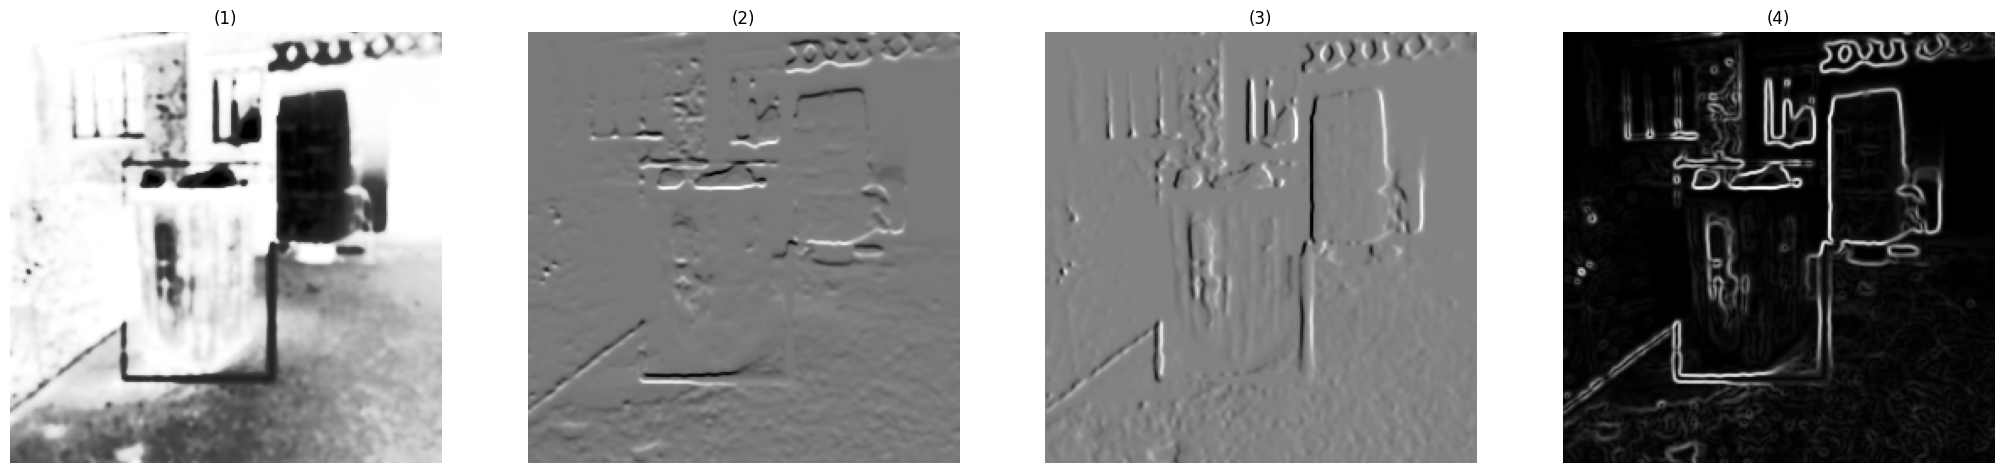

In [149]:
# Edge Detection:

# #sobel:
# cow_sobel_x = sobel_h(guassian_cow)  # Sobel operator for horizontal edges
# cow_sobel_y = sobel_v(guassian_cow)  # Sobel operator for vertical edges

# # Combine the horizontal and vertical edges to get the magnitude
# cow_sobel_magnitude = np.sqrt(cow_sobel_x**2 + cow_sobel_y**2)

# show_images(images=[gray_cow_img, cow_sobel_x, cow_sobel_y, cow_sobel_magnitude])

#sobel:
garb_sobel_x_2= sobel_h(1-enhanced_img_2)  # Sobel operator for horizontal edges
garb_sobel_y_2 = sobel_v(1-enhanced_img_2)  # Sobel operator for vertical edges

# Combine the horizontal and vertical edges to get the magnitude
garb_sobel_magnitude_2 = np.sqrt(garb_sobel_x_2**2 + garb_sobel_y_2**2)

show_images(images=[1-enhanced_img_2, garb_sobel_x_2, garb_sobel_y_2, garb_sobel_magnitude_2])

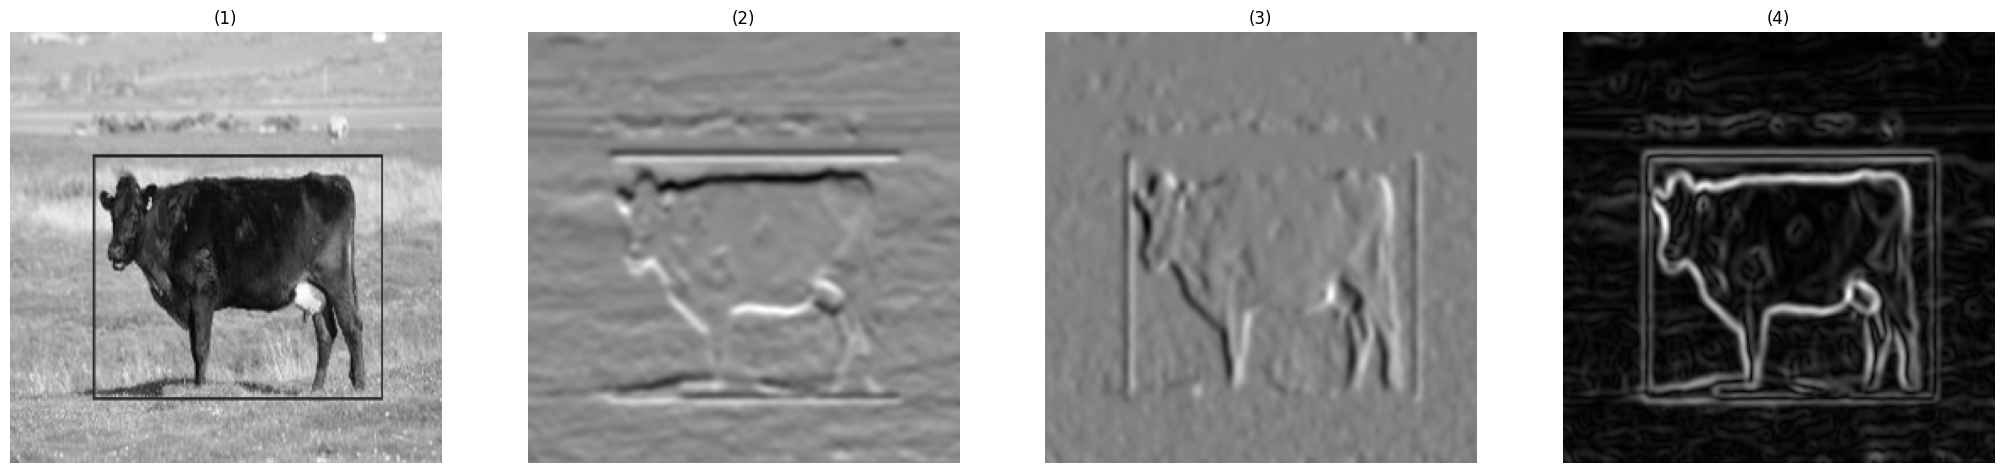

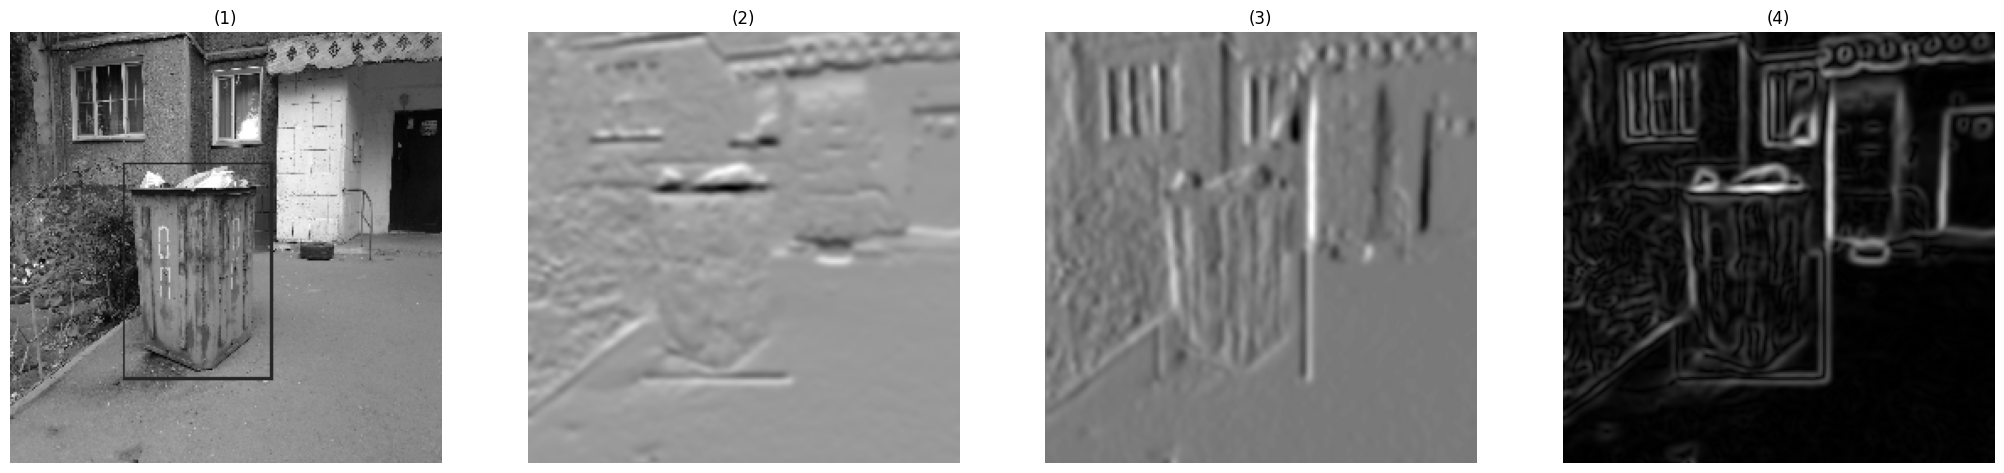

In [71]:
# Edge Detection:

#sobel:
cow_sobel_x = sobel_h(guassian_cow)  # Sobel operator for horizontal edges
cow_sobel_y = sobel_v(guassian_cow)  # Sobel operator for vertical edges

# Combine the horizontal and vertical edges to get the magnitude
cow_sobel_magnitude = np.sqrt(cow_sobel_x**2 + cow_sobel_y**2)

show_images(images=[gray_cow_img, cow_sobel_x, cow_sobel_y, cow_sobel_magnitude])

#sobel:
garb_sobel_x = sobel_h(guassian_garb)  # Sobel operator for horizontal edges
garb_sobel_y = sobel_v(guassian_garb)  # Sobel operator for vertical edges

# Combine the horizontal and vertical edges to get the magnitude
garb_sobel_magnitude = np.sqrt(garb_sobel_x**2 + garb_sobel_y**2)

show_images(images=[gray_garb_img, garb_sobel_x, garb_sobel_y, garb_sobel_magnitude])

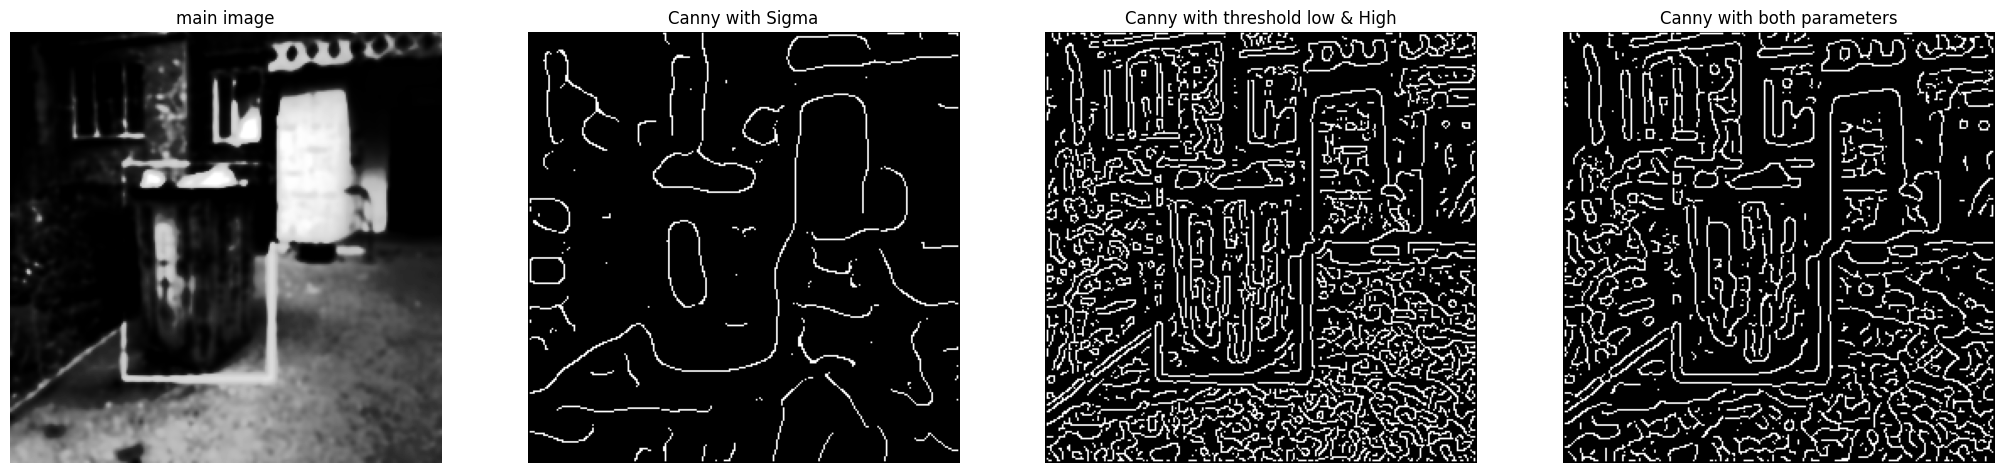

In [153]:
# Edge Detection

garb_canny_img_sigma=canny(enhanced_img_2, sigma=8)  # increasing sigma detects stronger edges
garb_canny_with_both_threshold=canny(enhanced_img_2, high_threshold=0.8, low_threshold=0.5)
garb_canny_with_both_par=canny(enhanced_img_2, sigma=2, high_threshold=0.8, low_threshold=0.5)


show_images(images=[enhanced_img_2,garb_canny_img_sigma ,garb_canny_with_both_threshold, garb_canny_with_both_par], titles=["main image","Canny with Sigma","Canny with threshold low & High", "Canny with both parameters"])


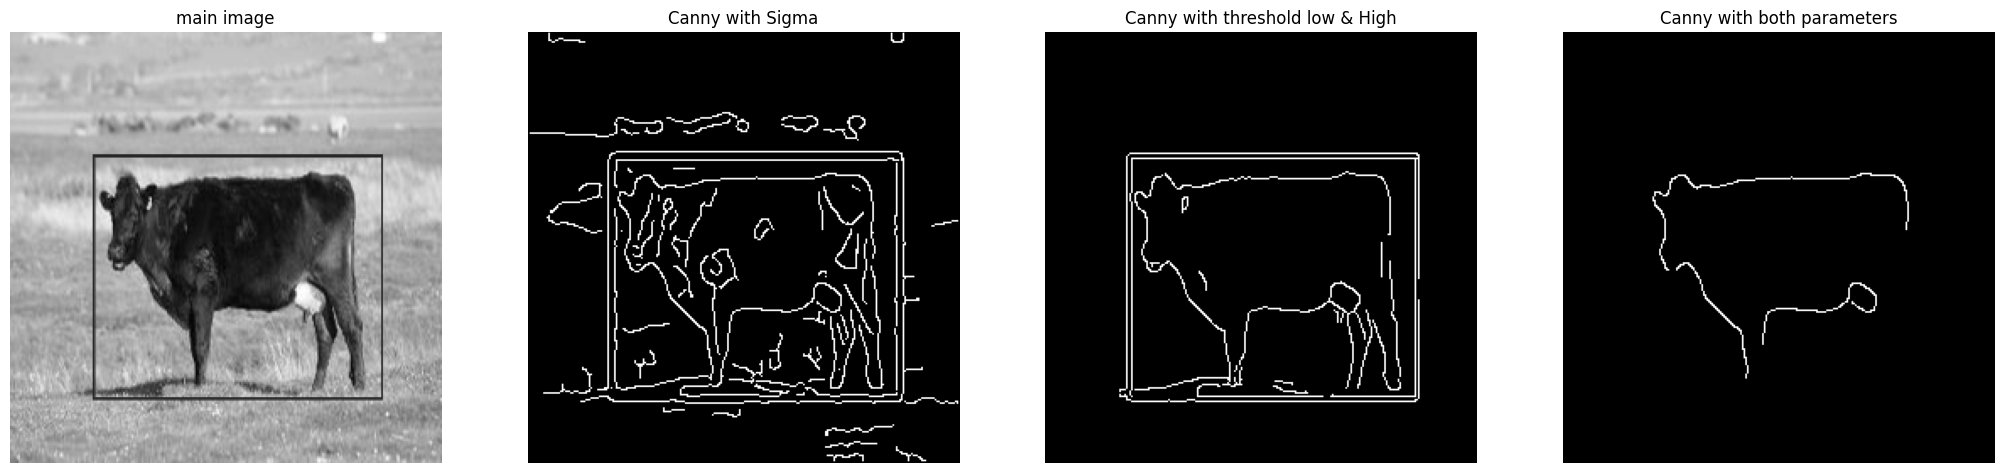

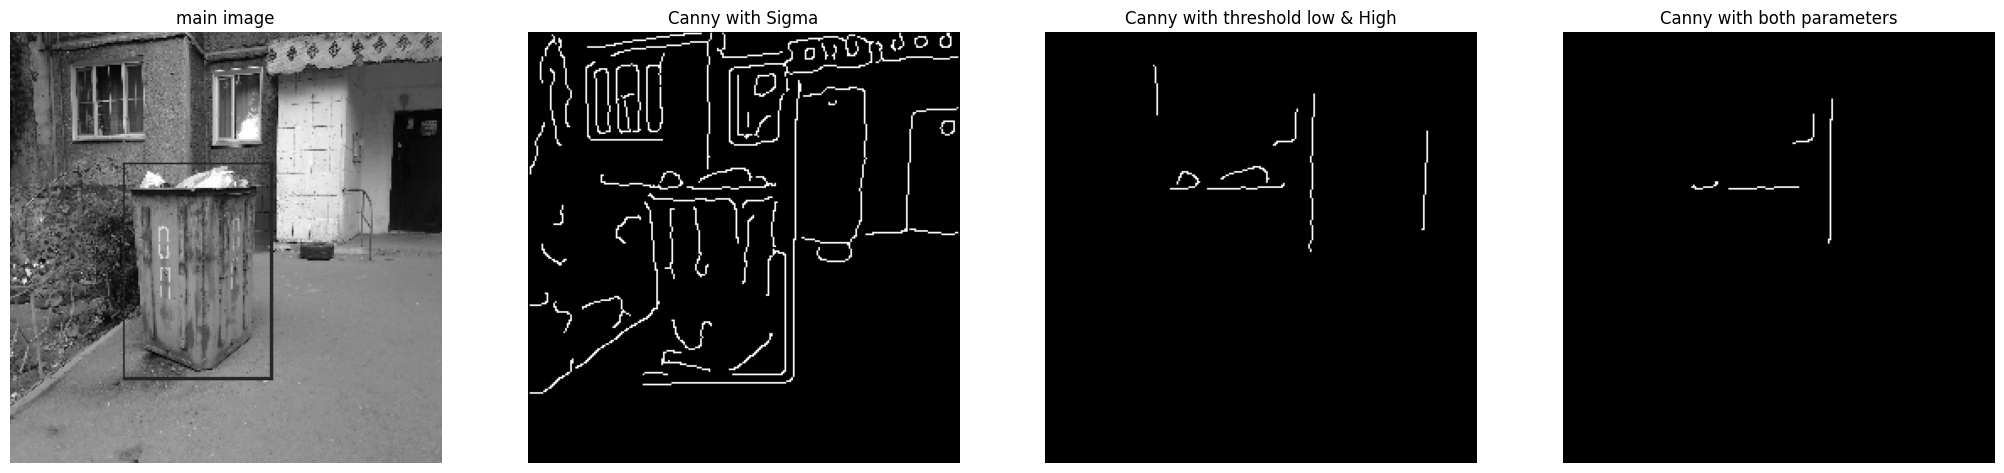

In [78]:
# Edge Detection

#canny
cow_canny_img_sigma=canny(gray_cow_img, sigma=2)  # increasing sigma detects stronger edges
cow_canny_with_both_threshold=canny(gray_cow_img, high_threshold=0.8, low_threshold=0.5)
cow_canny_with_both_par=canny(gray_cow_img, sigma=2, high_threshold=0.8, low_threshold=0.5)


garb_canny_img_sigma=canny(guassian_garb, sigma=2)  # increasing sigma detects stronger edges
garb_canny_with_both_threshold=canny(guassian_garb, high_threshold=0.8, low_threshold=0.5)
garb_canny_with_both_par=canny(guassian_garb, sigma=2, high_threshold=0.8, low_threshold=0.5)

show_images(images=[gray_cow_img,cow_canny_img_sigma ,cow_canny_with_both_threshold, cow_canny_with_both_par], titles=["main image","Canny with Sigma","Canny with threshold low & High", "Canny with both parameters"])
show_images(images=[gray_garb_img,garb_canny_img_sigma ,garb_canny_with_both_threshold, garb_canny_with_both_par], titles=["main image","Canny with Sigma","Canny with threshold low & High", "Canny with both parameters"])


Second We start doing hough transform with rectangle equation: x⋅cos(θ)+y⋅sin(θ)=r  to detect the 4 lines
